In [1]:
import torchaudio
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

**Load and convert the speech waveform to mono**

In [2]:
file_path="dataset/LJSpeech-1.1/wavs/LJ001-0001.wav"
waveform, sample_rate = torchaudio.load(file_path)
waveform = waveform.mean(dim=0).numpy()

**Extracting a phoneme segment based on time**

In [3]:
start_time = 1.0
end_time = 1.5
start_sample = int(start_time *16000)
end_sample = int(end_time*16000)
phoneme_segment = waveform[start_sample:end_sample]

**Computing FFT and the magnitude spectrum**

In [4]:
fft_result = np.fft.fft(phoneme_segment)
frequencies = np.fft.fftfreq(len(fft_result), d=1/sample_rate)
magnitude = np.abs(fft_result)

**Compute STFT**

In [5]:
stft_result=librosa.stft(phoneme_segment, n_fft=1024, hop_length=256)
spectrogram=librosa.amplitude_to_db(np.abs(stft_result))

**Plotting the time-domain and frequency-domain representations**

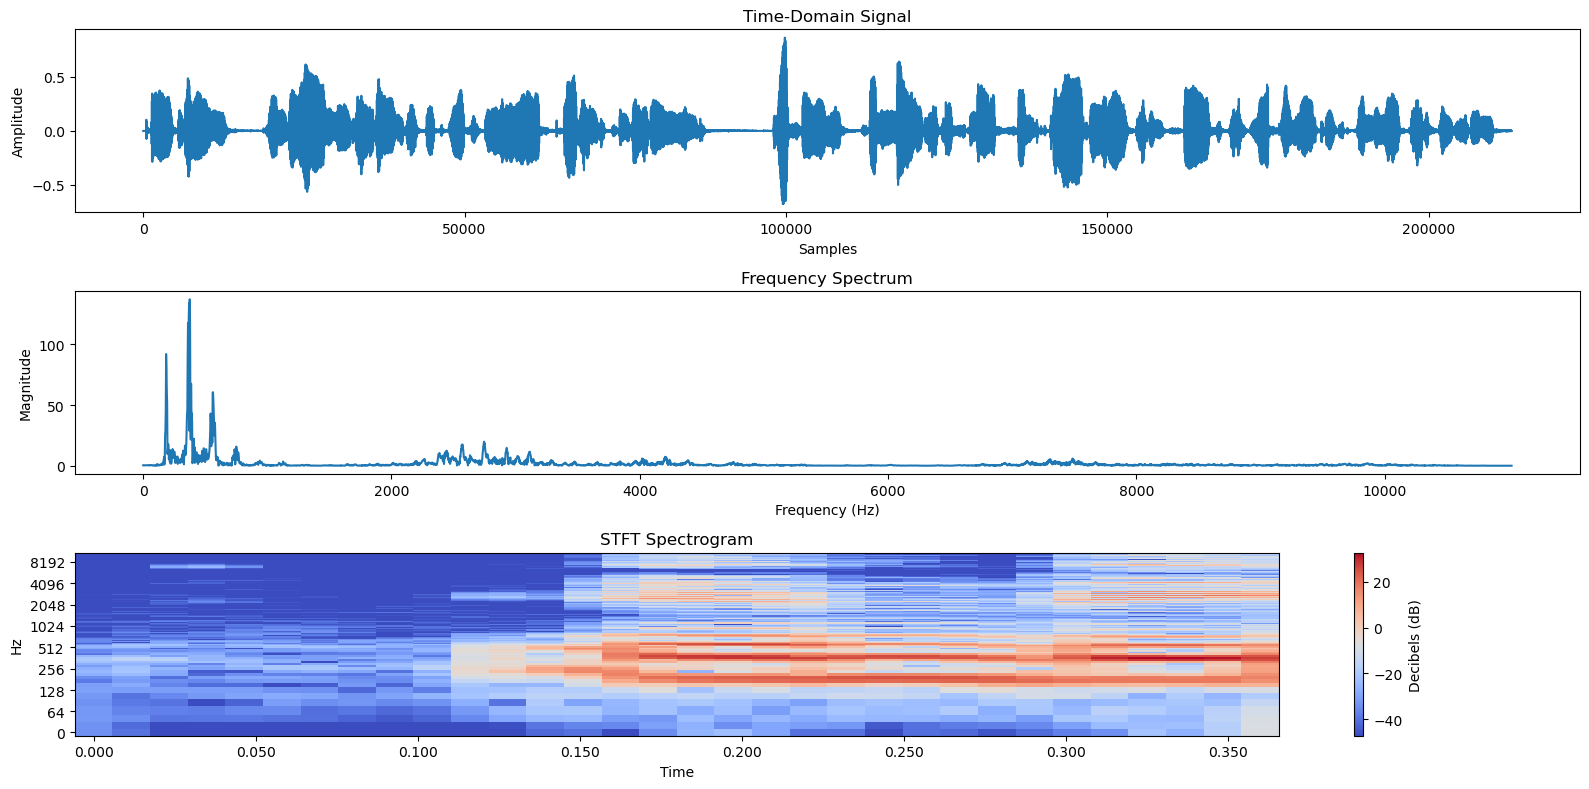

In [6]:
plt.figure(figsize=(16, 8))

plt.subplot(3, 1, 1)
plt.plot(waveform)
plt.title("Time-Domain Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2])
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.subplot(3,1,3)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=256, x_axis='time', y_axis='log')
plt.title("STFT Spectrogram")
plt.colorbar(label="Decibels (dB)")

plt.tight_layout()
plt.show()

**PART 2 OF EXPERIMENT**

In [13]:
import torchaudio
import librosa
import numpy as np
import matplotlib.pyplot as plt

**Load and convert speech waveform to mono**

In [14]:
file_path="dataset/LJSpeech-1.1/wavs/LJ001-0001.wav"
waveform, sample_rate = torchaudio.load(file_path)
waveform = waveform.mean(dim=0).numpy()

**Computing STFT**

In [15]:
stft_waveform = librosa.stft(waveform, n_fft=1024, hop_length=256)
spectrogram = np.abs(stft_waveform)
frequencies = np.fft.fftfreq(len(spectrogram), d=1/sample_rate)

**Define frequency ranges for energy calculation**

In [16]:
low_freq_band = (300, 3000)   # Vowels (low frequency)
high_freq_band = (4000, 8000) # Consonants (fricatives)

**Finding the indices corresponding to the frequency bands**

In [17]:
low_freq_indices = np.where((frequencies >= low_freq_band[0]) & (frequencies <= low_freq_band[1]))
high_freq_indices = np.where((frequencies >= high_freq_band[0]) & (frequencies <= high_freq_band[1]))

**Compute energy in the low-frequency band(vowels), high-frequency band(fricatives) and calculating the energy ratio**

In [18]:
low_freq_energy = np.sum(spectrogram[low_freq_indices])
high_freq_energy = np.sum(spectrogram[high_freq_indices])
energy_ratio = low_freq_energy / high_freq_energy
print("The energy of the vowels is",low_freq_energy)
print("The energy of the consonants is",high_freq_energy)
print("The energy ratio is",energy_ratio)

The energy of the vowels is 87023.75
The energy of the consonants is 19167.912
The energy ratio is 4.5400743
